In [1]:
# 导入数据集
from torch.utils.data import DataLoader
from utils.dataset import ERA5SstDataset

data_set = ERA5SstDataset(width=12, step = 12, lon=[60, 80], lat=[160, 180])
print(data_set.shape)

train_dataloader = DataLoader(data_set, batch_size=100, shuffle=False)

(30985, 721, 1440)


torch.Size([100, 11, 80, 80])
tensor([[19.9203, 20.0277, 20.1371,  ..., 18.1606, 18.0434, 17.9848],
        [20.1400, 20.2221, 20.3168,  ..., 18.4770, 18.3773, 18.3236],
        [20.3695, 20.4291, 20.4613,  ..., 18.8695, 18.7699, 18.7416],
        ...,
        [27.4369, 27.3930, 27.4076,  ..., 27.1898, 27.0395, 26.9291],
        [27.4076, 27.4057, 27.4428,  ..., 27.3080, 27.1625, 27.0346],
        [27.4379, 27.4623, 27.5336,  ..., 27.3900, 27.3295, 27.2250]])


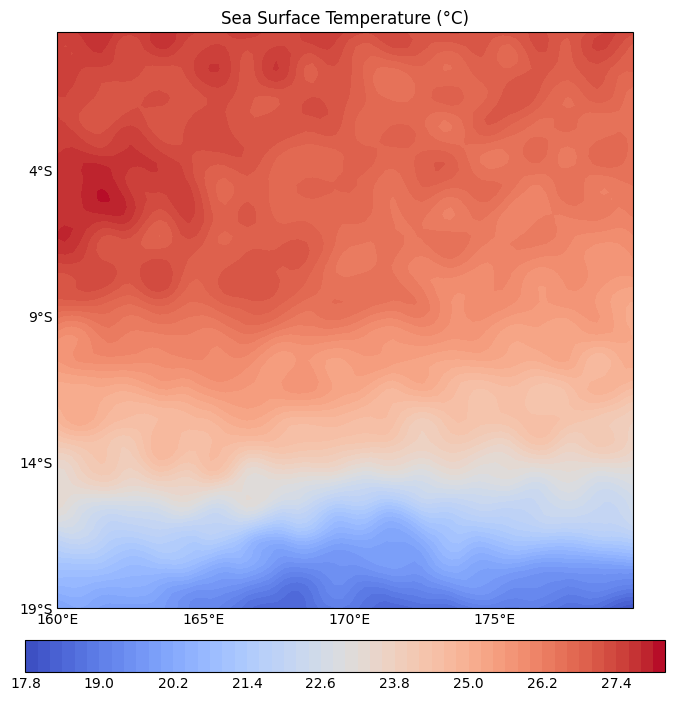

(<Figure size 1000x800 with 2 Axes>,
 <GeoAxes: title={'center': 'Sea Surface Temperature (°C)'}>)

In [2]:
# 查看数据
train_data, train_label = next(iter(train_dataloader))

print(train_data.shape)

first_batch = train_data[0]

from utils.plot import plot_sst_distribution

first_sst = first_batch[10]
print(first_sst)
plot_sst_distribution(first_sst)

In [4]:
# 训练模型
from models.LSTM import ConvLSTMNetwork
from utils.log import Log
from torch import optim

model = ConvLSTMNetwork(kernel_size=(3, 3), num_layers=5).to('cuda')

print(model)

print(model.parameters())

optimizer = optim.Adam(model.parameters(), lr=1)

model.fit(train_dataloader, epochs = 100, optimizer=optimizer)
    
Log.d('Finished Training')

ConvLSTMNetwork(
  (cells): ModuleList(
    (0-4): 5 x ConvLSTCell(
      (conv): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
)
<generator object Module.parameters at 0x000001899036F5A0>
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 1
    maximize: False
    weight_decay: 0
)
Epoch 1
---------------------------------
 loss: is 626.543212890625
 loss: is 592.5593872070312
 loss: is 586.5751342773438
 loss: is 601.2898559570312
 loss: is 609.294189453125
 loss: is 657.892333984375
 loss: is 718.8981323242188
 loss: is 777.6064453125
 loss: is 812.0916748046875
 loss: is 770.5601196289062
 loss: is 807.5611572265625
 loss: is 793.1119384765625
 loss: is 755.6016845703125
 loss: is 727.5254516601562
 loss: is 687.5582885742188
 loss: is 642.0310668945312
 loss: is 613.0408325195312
 loss: is 600.6117553710938
 loss: is 605.989990234375

KeyboardInterrupt: 

In [1]:
test_x, test_label = next(iter(train_dataloader))

test_x = test_x.clone().detach().to('cuda:0')

pred_x, (pred_h_state, pred_c_state)  = model(test_x)

plot_sst_distribution(test_label[0])
plot_sst_distribution(pred_c_state[-1].detach().cpu())

NameError: name 'train_dataloader' is not defined